# CS 171 Project
### Nicholas Kim, Christian Santos, Taeho Lee

## Briefly describe how your code can be run in each section, what is the sequence to run ? 

Run the code in order

# Data

### Describe your data source and how you will handle missing value, tranform data, or detect outliter 

Our data can be found here: https://www.kaggle.com/uciml/student-alcohol-consumption

The data was obtained through a survey of students in math and portuguese language courses in secondary school. 
It contains a lot of interesting social, gender and study information about students along with their grades for the class.

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
pd.set_option('max_columns', None)

## Extract Data

In [2]:
students = pd.read_csv('student-mat.csv')

In [3]:
display(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


## Data Clean AND Variable Selection

Data Cleansing includes but not limit to : 
1. Validate the data type
2. check missing values and decide to drop data or impute data
3. Detect Outliter and decide to drop data or impute data
4. Reformat the data column title

Outlier (Anomaly) detection is important since some machine learnings are not robust to outlier, hence the coefficient 
estimation may serverly impacted by outlier. 


### 1. Validate the data type

In [4]:
print(students.dtypes)
print(students.shape)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
(395, 33)


### 2. Check missing and duplicate values

In [5]:
print(students.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [6]:
print(students.duplicated().sum())

0


## 3. Detect Outliter and decide to drop data or impute data

In [7]:
"""
NOTE: This does not summarize non-numerical data types
"""
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


We will want to remove the G1 and G2 columns, as they are colinear to G3, which is the value we are trying to predict

In [8]:
students = students.drop(columns=['G1', 'G2'])

We will want to remove some absences because of outliers. If we remove anything outside of the 2x interquartile range, we remove anything above 24 absences (9 records)


Text(0.5, 0, 'absences')

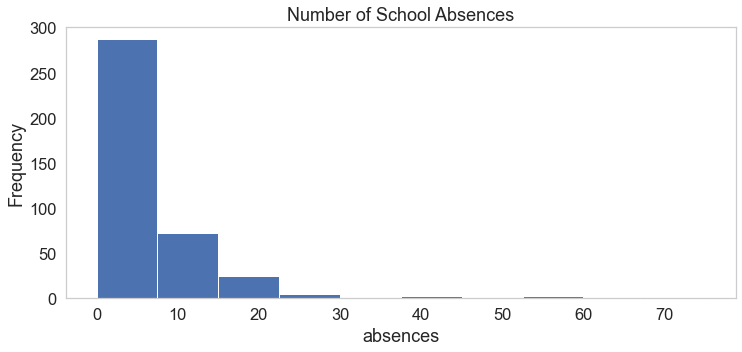

In [9]:
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.5, style='whitegrid')
absences_plot = students.absences.plot(kind='hist', title='Number of School Absences', grid = False)
absences_plot.set_xlabel("absences")

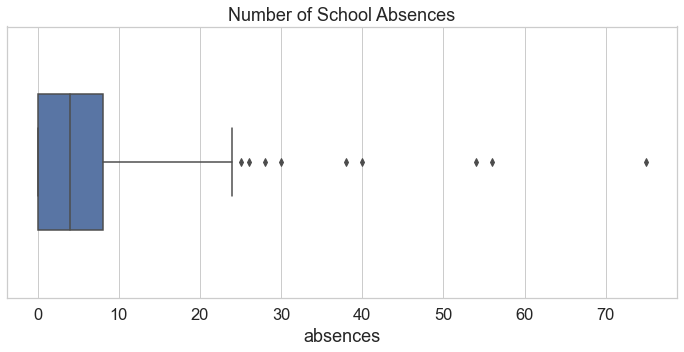

In [10]:
ax=sns.boxplot( x="absences", data=students, whis = 2.0, width = 0.5)
ax.set_title("Number of School Absences")
plt.show()

In [11]:
students = students[students.absences <= 24]

We will also want to remove some ages because outliers. There's only 4 records at or over the age of 20, which is probably not our typical secondary school student


Text(0.5, 0, 'age')

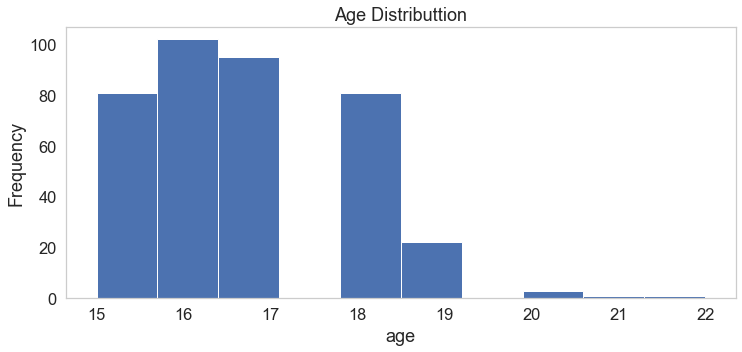

In [12]:
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.5, style='whitegrid')
absences_plot = students.age.plot(kind='hist', title='Age Distributtion', grid = False)
absences_plot.set_xlabel("age")

In [13]:
students = students[students.age < 20]

## 4. Reformat the data column title

We renamed our 'G3' column to 'final_grade' for for better understanding

In [14]:
students = students.rename(columns={"G3": "final_grade"})
students.columns = students.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace(')', '')
display(students)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,8
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,16
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,10


In [15]:
display(students)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,8
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,16
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,10


# Feature Engineering

## Convert Categorical Varaibles to Dummies to prevent Zero Cell Count Error

This step we will do integer encoding by replacing binary columns such as: internet, and sex to have 1's and 0's

In [16]:
students['internet'] = students.internet.eq('yes').mul(1)
students['romantic'] = students.romantic.eq('yes').mul(1)
students['higher'] = students.higher.eq('yes').mul(1)
students['nursery'] = students.nursery.eq('yes').mul(1)
students['activities'] = students.activities.eq('yes').mul(1)
students['paid'] = students.paid.eq('yes').mul(1)
students['famsup'] = students.famsup.eq('yes').mul(1)
students['schoolsup'] = students.schoolsup.eq('yes').mul(1)
students['sex'] = students.sex.eq('M').mul(1)
students['address'] = students.address.eq('U').mul(1)
students['famsize'] = students.famsize.eq('GT3').mul(1)
students['pstatus'] = students.pstatus.eq('T').mul(1)

These are currently the categorical variables that we will need to use dummy variables on

In [17]:
students[['school','mjob','fjob','reason','guardian']]

,school,mjob,fjob,reason,guardian
0,GP,at_home,teacher,course,mother
1,GP,at_home,other,course,father
2,GP,at_home,other,other,mother
3,GP,health,services,home,mother
4,GP,other,other,home,father
...,...,...,...,...,...
388,MS,teacher,services,course,mother
389,MS,other,other,course,mother
391,MS,services,services,course,mother
393,MS,services,other,course,mother


In [18]:
students = pd.get_dummies(students, columns = ['school','mjob','fjob','reason','guardian'])

## Dimension Reduction

The main motivations for dimensionality reduction are: <br>
1.To speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, making the training algorithm perform better) <br>
2.To visualize the data and gain insights on the most important features <br>
3.To save space (compression)<br>

The main drawbacks are: <br>
1.Some information is lost, possibly degrading the performance of subsequent training algorithms. <br>
2.It can be computationally intensive. <br>
3.It adds some complexity to your Machine Learning pipelines. <br>
4.Transformed features are often hard to interpret.



Combining Dalc and Walc to be an average so that we can reduce redudancies and look at overall alcohol consumption

In [19]:
students['alc'] = students[['walc', 'dalc']].mean(axis=1)
students = students.drop(columns=['walc', 'dalc'])

Removing not significant variables

In [20]:
students_x = students.drop(['alc', 'final_grade','age', 'famsize', 'studytime', 'failures', 'famsup', 'goout', 'absences', 'school_GP', 'school_MS', 
                           'mjob_at_home', 'mjob_services','fjob_services','fjob_teacher', 'reason_course', 'reason_other',
                           'reason_reputation','guardian_father','guardian_mother'], axis=1)
students_y = students[['final_grade']].copy(deep=True)

In [21]:
display(students)

,sex,age,address,famsize,pstatus,medu,fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,final_grade,school_GP,school_MS,mjob_at_home,mjob_health,mjob_other,mjob_services,mjob_teacher,fjob_at_home,fjob_health,fjob_other,fjob_services,fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,alc
0,0,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,3,6,6,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1.0
1,0,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,3,4,6,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1.0
2,0,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,3,10,10,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,2.5
3,0,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,5,2,15,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1.0
4,0,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,5,4,10,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0,18,1,0,1,3,1,1,2,0,0,1,1,0,1,1,1,0,4,3,4,1,0,8,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1.0
389,0,18,1,1,1,1,1,2,2,1,0,0,0,1,1,1,0,0,1,1,1,5,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0
391,1,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,2,3,16,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,3.5
393,1,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,5,0,10,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,3.5


## Regularization

Regularization is a technique to overcome both overfitting or underfitting of the data.

## Ensemble Learning

This technique is going to be used

## Machine Learnig Algorithm Exploration


Describe what machine learning algorithms are suitable to answer your business questions, fit the model

We will be exploring...


In [22]:
# library
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(students)
plt.show()

corr = students.corr()
print(corr, type(corr))
corr.style.background_gradient(cmap='coolwarm')
#No obvious correlaiton found in second half independent variables

                        sex       age   address   famsize   pstatus      medu  \
sex                1.000000 -0.065811 -0.033069 -0.089802  0.045749  0.081502   
age               -0.065811  1.000000 -0.147745 -0.058786  0.077877 -0.176204   
address           -0.033069 -0.147745  1.000000 -0.063170 -0.048002  0.127970   
famsize           -0.089802 -0.058786 -0.063170  1.000000  0.143130  0.042036   
pstatus            0.045749  0.077877 -0.048002  0.143130  1.000000 -0.124080   
medu               0.081502 -0.176204  0.127970  0.042036 -0.124080  1.000000   
fedu               0.048384 -0.149657  0.069768  0.054824 -0.116933  0.634705   
traveltime         0.065528  0.094926 -0.339475 -0.062868  0.032865 -0.184621   
studytime         -0.291315  0.023081 -0.018224  0.073155  0.005838  0.068224   
failures           0.028929  0.159582 -0.076354  0.008638 -0.006691 -0.239383   
schoolsup         -0.129969 -0.243516  0.017547  0.019844 -0.059349 -0.039324   
famsup            -0.142147 

,sex,age,address,famsize,pstatus,medu,fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,final_grade,school_GP,school_MS,mjob_at_home,mjob_health,mjob_other,mjob_services,mjob_teacher,fjob_at_home,fjob_health,fjob_other,fjob_services,fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,alc
sex,1.000000,-0.065811,-0.033069,-0.089802,0.045749,0.081502,0.048384,0.065528,-0.291315,0.028929,-0.129969,-0.142147,-0.133596,0.103975,-0.011772,-0.159758,0.069736,-0.094797,0.051507,0.219861,0.063551,0.144974,-0.014064,0.107113,0.023717,-0.023717,-0.154406,-0.012654,0.020506,-0.018715,0.160929,-0.082515,-0.063201,0.039197,0.001389,0.044061,0.032828,0.071811,0.006782,-0.112256,0.052516,0.001229,-0.090705,0.296310
age,-0.065811,1.000000,-0.147745,-0.058786,0.077877,-0.176204,-0.149657,0.094926,0.023081,0.159582,-0.243516,-0.120130,-0.024333,-0.072468,-0.047958,-0.181825,-0.082661,0.149700,0.005241,-0.023721,0.128555,-0.056411,0.186766,-0.179905,-0.365649,0.365649,0.117120,-0.101188,0.042476,-0.031383,-0.056669,0.101385,-0.107987,0.014339,0.021168,-0.061444,-0.029831,0.057243,0.005847,-0.028703,-0.093913,-0.092195,0.326446,0.104241
address,-0.033069,-0.147745,1.000000,-0.063170,-0.048002,0.127970,0.069768,-0.339475,-0.018224,-0.076354,0.017547,0.002651,0.035677,-0.066514,0.048034,0.029247,0.219677,0.005946,0.013834,0.014014,0.049230,-0.039531,-0.009953,0.105137,0.287042,-0.287042,-0.159001,0.097775,-0.011624,0.055725,0.030340,0.013058,0.059899,-0.055396,0.020109,0.011169,-0.046266,0.155845,-0.047836,-0.074669,0.075380,-0.094245,0.045016,-0.126081
famsize,-0.089802,-0.058786,-0.063170,1.000000,0.143130,0.042036,0.054824,-0.062868,0.073155,0.008638,0.019844,0.125633,0.014374,0.018402,-0.100621,0.021926,-0.002946,-0.030822,0.020608,-0.006893,-0.019442,0.025902,-0.049703,-0.087862,0.065626,-0.065626,0.028140,-0.009728,0.072368,-0.035857,-0.073774,-0.057802,-0.021926,-0.007668,0.004083,0.073663,-0.027486,0.009618,0.022158,0.005871,0.013421,-0.018764,0.011635,-0.105192
pstatus,0.045749,0.077877,-0.048002,0.143130,1.000000,-0.124080,-0.116933,0.032865,0.005838,-0.006691,-0.059349,-0.005018,0.051562,0.107015,-0.097167,-0.073031,0.044901,-0.038960,0.043084,0.066252,-0.001691,0.054842,-0.112756,-0.055416,-0.060951,0.060951,0.064954,0.006452,-0.035020,-0.030072,0.013306,-0.042039,-0.052306,-0.012529,0.103095,-0.072992,0.031079,-0.019905,0.012243,-0.021911,0.098917,-0.082153,-0.016699,0.002203
medu,0.081502,-0.176204,0.127970,0.042036,-0.124080,1.000000,0.634705,-0.184621,0.068224,-0.239383,-0.039324,0.183920,0.149717,0.109175,0.194687,0.184379,0.192161,0.027085,-0.004958,0.031238,0.059725,-0.053261,0.115922,0.218844,0.128408,-0.128408,-0.406137,0.249071,-0.227307,0.048789,0.457672,-0.073806,0.085159,-0.109120,-0.038757,0.264014,-0.089334,-0.014898,0.007513,0.107459,-0.045363,0.111153,-0.126436,-0.015879
fedu,0.048384,-0.149657,0.069768,0.054824,-0.116933,0.634705,1.000000,-0.159803,-0.024289,-0.243884,0.036106,0.172774,0.080940,0.116004,0.140329,0.165019,0.119243,0.014351,0.008860,0.005884,0.052551,0.007980,0.020892,0.154254,0.066934,-0.066934,-0.172557,0.124136,-0.204212,0.049799,0.288726,-0.038899,0.164036,-0.250624,0.012557,0.350634,-0.018727,-0.008721,-0.004638,0.032194,0.109289,-0.049690,-0.093414,0.007381
traveltime,0.065528,0.094926,-0.339475,-0.062868,0.032865,-0.184621,-0.159803,1.000000,-0.102949,0.109683,-0.011066,-0.007852,-0.075669,-0.007236,-0.027002,-0.086612,-0.127893,0.014337,-0.007802,-0.009864,0.028472,0.004978,-0.031833,-0.117617,-0.256080,0.256080,0.155581,-0.116969,0.042229,-0.051121,-0.058442,-0.083318,-0.089384,0.091517,-0.026123,0.013859,0.113811,-0.094399,0.003766,-0.031873,0.031702,-0.064402,0.064128,0.176744
studytime,-0.291315,0.023081,-0.018224,0.073155,0.005838,0.068224,-0.024289,-0.102949,1.000000,-0.174145,0.036762,0.135782,0.167285,0.098495,0.079617,0.172977,0.047441,0.

### Candidate ML Algorithm 1


Simple linear regression using alcohol consumption to predict final grade


In [67]:
students_x = students[['alc']].copy(deep=True)
students_y = students[['final_grade']].copy(deep=True)

In [68]:
scaler = StandardScaler()
x = scaler.fit_transform(students_x)
y = scaler.fit_transform(students_y)

In [69]:
#Scikit-learn
x_train, x_test, y_train, y_test = train_test_split(students_x, \
                                                    students_y, \
                                                    test_size=0.2, \
                                                    random_state=4)

In [70]:
reg_simple = linear_model.LinearRegression()
reg_simple.fit(x_train, y_train)

LinearRegression()

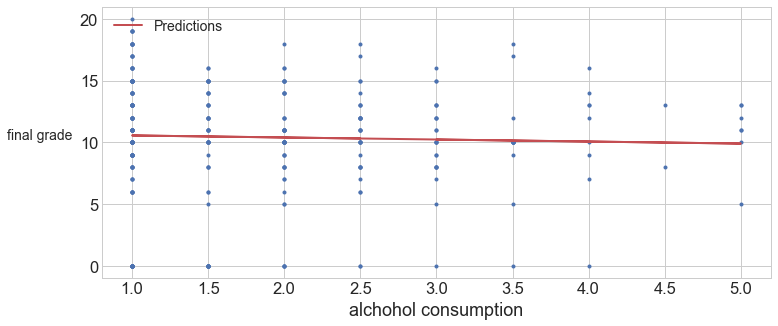

In [71]:

y_new = reg_simple.predict(x_train)
plt.plot(x_train, y_train, "b.")
plt.plot(x_train, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("alchohol consumption", fontsize=18)
plt.ylabel("final grade", labelpad = 40.0, rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
plt.show()

In [72]:
print(reg_simple.coef_)
print(reg_simple.intercept_)
print(reg_simple.score(x_train, y_train)) # R^2 for training set
print(reg_simple.score(x_test, y_test)) # R^2 for test set

[[-0.16411442]]
[10.72682731]
0.0012331108846272976
0.004820152478384077


In [73]:
yhat_simple = reg_simple.predict(x_test)

In [75]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat_simple)

20.488384703639486

### Candidate ML Algorithm 2


Multiple linear regression using all other features other than alcohol consumption to predict final grade


In [76]:
students_x = students.drop(['alc', 'final_grade'], axis=1)
students_y = students[['final_grade']].copy(deep=True)

In [77]:
scaler = StandardScaler()
x = scaler.fit_transform(students_x)
y = scaler.fit_transform(students_y)

In [78]:
#Scikit-learn
x_train, x_test, y_train, y_test = train_test_split(students_x, \
                                                    students_y, \
                                                    test_size=0.2, \
                                                    random_state=4)

In [79]:
reg_multi = linear_model.LinearRegression()
reg_multi.fit(x_train, y_train)

LinearRegression()

In [80]:
print(reg_multi.coef_)
print(reg_multi.intercept_)
print(reg_multi.score(x_train, y_train)) # R^2 for training set
print(reg_multi.score(x_test, y_test)) # R^2 for test set

[[ 1.12920538e+00 -5.74651342e-01  8.62383511e-01 -1.17200581e+00
  -6.23019173e-03  3.54603284e-01  7.32511609e-02 -6.40374850e-02
   7.14486878e-01 -1.55495823e+00 -1.02082576e+00 -1.27152557e+00
   5.03295339e-01 -4.38086776e-01  1.49037300e-01  1.27023187e+00
   3.52970998e-01 -9.42708940e-01  1.19127243e-01  2.84497302e-01
  -5.81407733e-01 -1.37581173e-01  1.59533369e-01 -3.86391182e+11
  -3.86391182e+11 -2.43066210e+12 -2.43066210e+12 -2.43066210e+12
  -2.43066210e+12 -2.43066210e+12  1.15287459e+12  1.15287459e+12
   1.15287459e+12  1.15287459e+12  1.15287459e+12 -2.79699230e+11
  -2.79699230e+11 -2.79699230e+11 -2.79699230e+11 -1.77899762e+12
  -1.77899762e+12 -1.77899762e+12]]
[3.72287554e+12]
0.29420561913618626
0.20998908927609705


In [84]:
yhat_multi = reg_multi.predict(x_test)

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat_multi)

16.264444561747762

In [86]:
yhat_train= reg_multi.predict(x_train)

In [87]:
residual_train= y_train - yhat_train

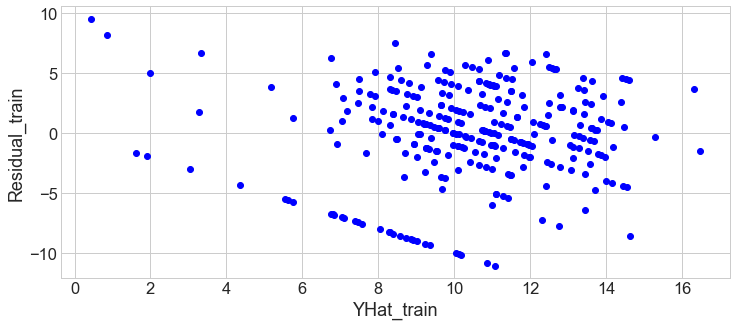

In [88]:
#Draw Residual Chart by Fitted Value of Train Data
plt.style.use('seaborn-whitegrid')
x = yhat_train
y = residual_train

plt.plot(x, y, 'o', color='blue')
plt.xlabel('YHat_train')
plt.ylabel('Residual_train');

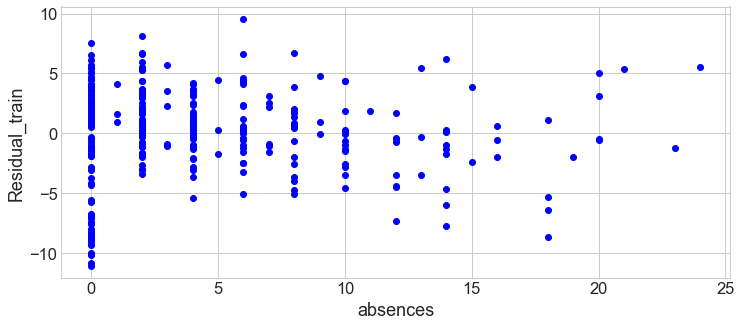

In [89]:
plt.style.use('seaborn-whitegrid')
x = x_train[["absences"]]
y = residual_train

plt.plot(x, y, 'o', color='blue')
plt.xlabel('absences')
plt.ylabel('Residual_train');

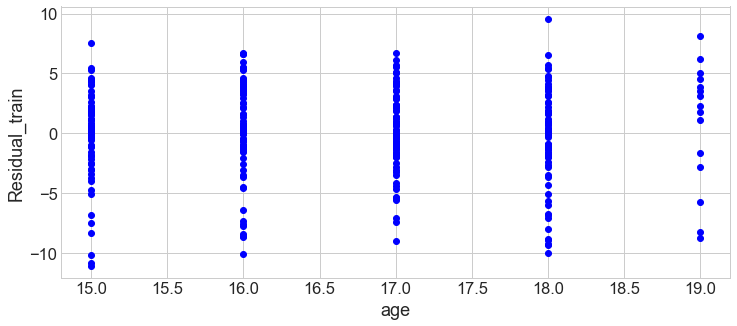

In [90]:
plt.style.use('seaborn-whitegrid')
x = x_train[["age"]]
y = residual_train

plt.plot(x, y, 'o', color='blue')
plt.xlabel('age')
plt.ylabel('Residual_train');

In [91]:
import statsmodels.api as sm
import numpy as np
Y = y_train
X = x_train
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                7.019742
sex                  1.130854
age                 -0.574537
address              0.863184
famsize             -1.172745
pstatus             -0.007569
medu                 0.353844
fedu                 0.073225
traveltime          -0.064574
studytime            0.714479
failures            -1.555272
schoolsup           -1.020580
famsup              -1.271304
paid                 0.502564
activities          -0.437435
nursery              0.150839
higher               1.270433
internet             0.353504
romantic            -0.941965
famrel               0.119252
freetime             0.284636
goout               -0.581573
health              -0.137662
absences             0.159536
school_GP            3.253915
school_MS            3.765827
mjob_at_home         1.897536
mjob_health          1.885749
mjob_other           1.106721
mjob_services        2.248019
mjob_teacher        -0.118284
fjob_at_home         0.666020
fjob_health          1.116541
fjob_other

In [92]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2.997
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.71e-07
Time:                        20:42:51   Log-Likelihood:                -844.93
No. Observations:                 304   AIC:                             1766.
Df Residuals:                     266   BIC:                             1907.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.0197      2.205      3.184      0.002       2.679      11.361
sex                   1.1309      0.587      1.927      0.055      -0.025       2.287
age                  -0.5745      0.265     -2.167      0.031      -1.097      -0.052
address               0.8632      0.671      1.287      0.199      -0.458       2.184
famsize              -1.1727      0.574     -2.043      0.042      -2.303      -0.042
pstatus              -0.0076      0.882     -0.009      0.993      -1.743       1.728
medu                  0.3538      0.378      0.937      0.350      -0.390       1.098
fedu                  0.0732      0.342      0.214      0.831      -0.601       0.747
traveltime           -0.0646      0.401     -0.161      0.872      -0.853       0.724
studytime             0.7145      0.339      2.110      0.036       0.048       1.381
failures             -1.5553      0.417     -3.733      0.000      -2.376      -0.735
schoolsup            -1.0206      0.790     -1.292      0.197      -2.576       0.535
famsup               -1.2713      0.578     -2.199      0.029      -2.410      -0.133
paid                  0.5026      0.553      0.909      0.364      -0.586       1.591
activities           -0.4374      0.525     -0.834      0.405      -1.470       0.595
nursery               0.1508      0.676      0.223      0.824      -1.181       1.482
higher                1.2704      1.261      1.007      0.315      -1.213       3.754
internet              0.3535      0.694      0.509      0.611      -1.014       1.721
romantic             -0.9420      0.549     -1.715      0.088      -2.023       0.140
famrel                0.1193      0.286      0.417      0.677      -0.443       0.682
freetime              0.2846      0.280      1.016      0.310      -0.267       0.836
goout                -0.5816      0.238     -2.439      0.015      -1.051      -0.112
health               -0.1377      0.194     -0.711      0.478      -0.519       0.244
absences              0.1595      0.051      3.104      0.002       0.058       0.261
school_GP             3.2539      1.059      3.073      0.002       1.169       5.339
school_MS             3.7658      1.326      2.840      0.005       1.155       6.377
mjob_at_home          1.8975      0.806      2.353      0.019       0.310       3.485
mjob_health           1.8857      0.867      2.174      0.031       0.178       3.593
mjob_other            1.1067      0.633      1.748      0.082      -0.140       2.353
mjob_services         2.2480      0.685      3.281      0.001       0.899       3.597
mjob_teacher         -0.1183      0.849     -0.139      0.889      -1.790       1.554
fjob_at_home          0.6660      1.159      0.575      0.566      -1.616       2.948
fjob_health           1.1165      1.151      0.970      0.333      -1.150

In [93]:
scaler = StandardScaler()
x = scaler.fit_transform(students_x)
y = scaler.fit_transform(students_y)

In [94]:
#Scikit-learn
x_train, x_test, y_train, y_test = train_test_split(students_x, \
                                                    students_y, \
                                                    test_size=0.2, \
                                                    random_state=4)

In [95]:
reg_multi = linear_model.LinearRegression()
reg_multi.fit(x_train, y_train)

LinearRegression()

In [96]:
print(reg_multi.coef_)
print(reg_multi.intercept_)
print(reg_multi.score(x_train, y_train)) # R^2 for training set
print(reg_multi.score(x_test, y_test)) # R^2 for test set

[[ 1.12920538e+00 -5.74651342e-01  8.62383511e-01 -1.17200581e+00
  -6.23019173e-03  3.54603284e-01  7.32511609e-02 -6.40374850e-02
   7.14486878e-01 -1.55495823e+00 -1.02082576e+00 -1.27152557e+00
   5.03295339e-01 -4.38086776e-01  1.49037300e-01  1.27023187e+00
   3.52970998e-01 -9.42708940e-01  1.19127243e-01  2.84497302e-01
  -5.81407733e-01 -1.37581173e-01  1.59533369e-01 -3.86391182e+11
  -3.86391182e+11 -2.43066210e+12 -2.43066210e+12 -2.43066210e+12
  -2.43066210e+12 -2.43066210e+12  1.15287459e+12  1.15287459e+12
   1.15287459e+12  1.15287459e+12  1.15287459e+12 -2.79699230e+11
  -2.79699230e+11 -2.79699230e+11 -2.79699230e+11 -1.77899762e+12
  -1.77899762e+12 -1.77899762e+12]]
[3.72287554e+12]
0.29420561913618626
0.20998908927609705


In [97]:
yhat = reg_multi.predict(x_test)

In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat)

16.264444561747762

In [99]:
import statsmodels.api as sm
import numpy as np
Y = y_train
X = x_train

model = sm.OLS(Y, X).fit()

#display adjusted R-squared
print(model.rsquared_adj)

0.19602546030295787


### Candidate ML Algorithm 3

In [100]:
students_x = students[['absences']].copy(deep=True)
students_y = students[['final_grade']].copy(deep=True)

In [101]:
X_b = np.c_[np.ones((381, 1)), students_x]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(students_y)

In [102]:
theta_best

array([[9.99852793],
       [0.09008159]])

In [103]:
X_new = np.array([[0], [25]]) #assign 2 new x instance 0 and 2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 9.99852793],
       [12.25056764]])

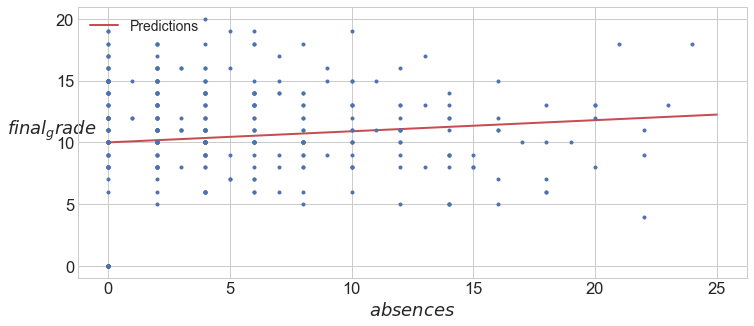

In [104]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(students_x, students_y, "b.")
plt.xlabel("$absences$", fontsize=18)
plt.ylabel("$final_grade$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

## In-Sample Validation


Describe the what metric you will use for testing model performance, and list the performance for each algorithm you tried 


### Peformance of ML Algorithm 1

In [105]:
"""
R^2 for training data: 0.0012331108846272976
R^2 for test data: 0.004820152478384188
MSE: 20.488384703639483
"""

'\nR^2 for training data: 0.0012331108846272976\nR^2 for test data: 0.004820152478384188\nMSE: 20.488384703639483\n'

In [106]:
"""
Interpretation: 

This linear regression model serves as a baseline to our other models. While it may be alarming to see a low r-squared value,
we would argue that this is normal. We can't assume that alcohol consumption or any other relevant predictors to explain a
student's grade in secondary school. This is due to the fact that humans are extremely complex. However, we can see that there
is a high amount of variance in the data. 

"""

"\nInterpretation: \n\nThis linear regression model serves as a baseline to our other models. While it may be alarming to see a low r-squared value,\nwe would argue that this is normal. We can't assume that alcohol consumption or any other relevant predictors to explain a\nstudent's grade in secondary school. This is due to the fact that humans are extremely complex. However, we can see that there\nis a high amount of variance in the data. \n\n"

## Peformance of ML Algorithm 2

In [59]:
"""
R^2 for training data: 0.29419888502894154
R^2 for test data: 0.20993104677264995
MSE: 16.265639518762562
"""

'\nR^2 for training data: 0.29419888502894154\nR^2 for test data: 0.20993104677264995\nMSE: 16.265639518762562\n'

In [60]:
"""
Interpretation:

Our R^2 values for this model were on the lower side. However, this does not mean that the model is bad. It simply
means thats there are various factors that influence a person's grade. It is very hard to predict humans. As indicated by 
the r-squared values and the MSE values, we had better results compared to our first model. This would seemingly suggest that 
we had a significantly better linear model fit.

"""

"\nInterpretation:\n\nOur R^2 values for this model were on the lower side. However, this does not mean that the model is bad. It simply\nmeans thats there are various factors that influence a person's grade. It is very hard to predict humans. As indicated by \nthe r-squared values and the MSE values, we had better results compared to our first model. This would seemingly suggest that \nwe had a significantly better linear model fit.\n\n"

In [61]:
"""
Instead of using r-squared to calculate the performance of our multiple variable linear regression model, we want to use an
adjusted r-squared value. We want to use an adjusted r-squared value instead because, adjusted R-squared is a modified 
version of R-squared that has been adjusted for the number of predictors in the model.

However, before we calculate this value we want to get rid of variables that are not significant in this model. To do this, we 
calculate the p-values for each variable and see if they are significant to a 95% degree.

"""

'\nInstead of using r-squared to calculate the performance of our multiple variable linear regression model, we want to use an\nadjusted r-squared value. We want to use an adjusted r-squared value instead because, adjusted R-squared is a modified \nversion of R-squared that has been adjusted for the number of predictors in the model.\n\nHowever, before we calculate this value we want to get rid of variables that are not significant in this model. To do this, we \ncalculate the p-values for each variable and see if they are significant to a 95% degree.\n\n'

In [62]:
"""
After dropping non significant variables:
Adjusted r-squared value: 0.8446549165961268
"""

'\nAfter dropping non significant variables:\nAdjusted r-squared value: 0.8446549165961268\n'

In [63]:
"""
Interpretation:

This is a much better value than what we previously had. It shows that our model's dependent variables explains 84% of the 
independent variable's variation. 
"""

"\nInterpretation:\n\nThis is a much better value than what we previously had. It shows that our model's dependent variables explains 84% of the \nindependent variable's variation. \n"

## Peformance of ML Algorithm 3

## Ensemble Technique Applied


Describe the what ensemble technique can be applied to enhance your model performance and how do you apply it, 
you can try couple differnt esenble methods if you want 


We will try using the average result from ML Algorithms 1 and 2

In [127]:
ensemble_simple = pd.DataFrame(yhat_simple)
ensemble_simple.columns = ['Simple']
ensemble_multi = pd.DataFrame(yhat_multi)
ensemble_multi.columns = ['Multiple']

ensemble = pd.concat([ensemble_simple, ensemble_multi], axis=1)
ensemble['Ensemble'] = ensemble.mean(axis=1)

In [128]:
display(ensemble)

,Simple,Multiple,Ensemble
0,10.152427,12.966797,11.559612
1,10.562713,10.765625,10.664169
2,10.234484,4.891113,7.562799
3,10.562713,10.381836,10.472274
4,10.562713,11.711914,11.137313
...,...,...,...
72,10.562713,11.422363,10.992538
73,10.480656,10.849609,10.665133
74,10.562713,8.758301,9.660507
75,10.234484,12.626465,11.430474


In [129]:
mean_squared_error(y_test, ensemble['Ensemble'])

16.71297556190066

## Conclusion


Describe what ML Algorithm(s) you finally decide to use, and what Ensemble technique(s) you decide to use, and 
conclude the model performance in terms of metric here


Assumption: all students drink